# Analysis of the weatherStation data
In this notebook we use some basic time series tools to analyze a dataset of temperatures and humidity from the Otaniemi area. The measurements are taken from a timeperiod of five days (21.11.2018 - 26.11.2018). 

This project is part my full stack data analysis project that can be found from Github:

https://github.com/JoonasMaanonen/weatherStation

## Original Timeseries
Let's first plot the original timeseries and analyze that. 

Since our measurements are temperature and humidity. We expect to see some sort of trend, since during the measuring period the weather was getting colder by the day. We can see this hypothesis take place from the plots. The temperature timeseries has a slight downwards trend and the humidity timeseries has slight upwards trend. This also indicates that temperature and humidity are negatively correlated. 

The plots indicate also that there might be some deterministic seasonality with some period length. A logic assumption would be that the period length is 24 hours, since we are talking about weather measurements.

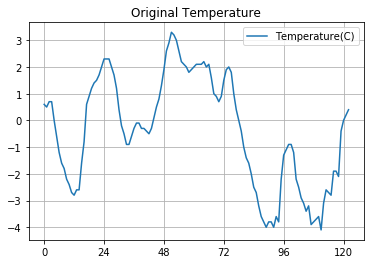

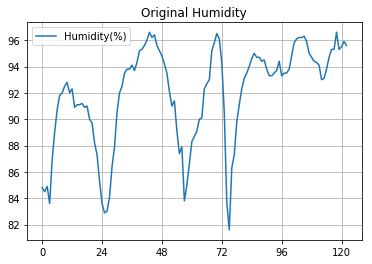

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("measurements.csv")

temp_series = data[["Date", "Temperature(C)"]]
hum_series = data[["Date", "Humidity(%)"]]

temp_series.plot(title="Original Temperature")
_ = plt.xticks(np.arange(0, 122, 24))
plt.grid(True)

hum_series.plot(title="Original Humidity")
_ = plt.xticks(np.arange(0, 122, 24))
plt.grid(True)

## Differencing


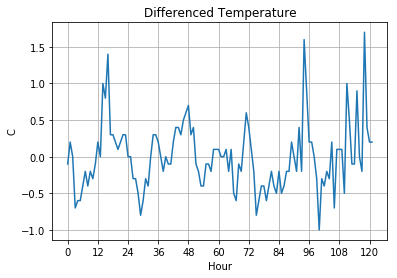

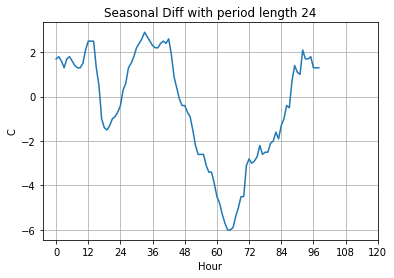

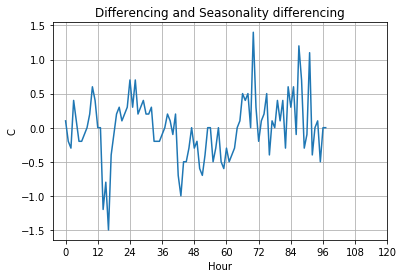

In [120]:
# Computes that difference
def difference(data, lag=1):
    diffed_data = []
    for i in range(lag, len(data)):
        value = data[i] - data[i - lag]
        diffed_data.append(value)
    return diffed_data

# Extract the raw data
data_values = data.values
temp = data_values[:, 2]
hum = data_values[:, 3]
dates = data_values[:,0]

# Normal Differencing
plt.figure(2)
diff_temp = difference(temp)
plt.plot(diff_temp)
_ = plt.xticks(np.arange(0, 122, 12))
plt.grid(True)
plt.title("Differenced Temperature")
plt.ylabel("C")
plt.xlabel("Hour")
plt.show()

plt.figure(3)
# D24
diff24_temp = difference(temp, lag=24)
plt.plot(diff24_temp)
_ = plt.xticks(np.arange(0, 122, 12))
plt.grid(True)
plt.title("Seasonal Diff with period length 24")
plt.ylabel("C")
plt.xlabel("Hour")
plt.show()

plt.figure(4)
final_diff_temp = difference(diff24_temp, lag=1)
plt.plot(final_diff_temp)
_ = plt.xticks(np.arange(0, 122, 12))
plt.grid(True)
plt.title("Differencing and Seasonality differencing")
plt.ylabel("C")
plt.xlabel("Hour")
plt.show()